In [1]:
# Intro to maxhine learning
# algorithm, models that help computer to learn and predict
# Applications of Machine Learning

"""summary
1.Image processing
2.Speech recognition
3.Fraud detection

Approachhes to Machine Learning
1.Supervised Learning- dataset tht is labelled, predict, Linear regression
,decisiontreee, Support vector machine, neuralnetworks( Supervised Learning Algorithms)
2. Unsupervised Learning- deals with unlabeled data, clustering data, clustering algorithms,
to group data together
3.Reinforcement Learning

#Problem formulation
Define the problem!Classificaton task, regression analysis, Clustering, 
Anomaly detection recommendation
2.Gather the data
3.split the data- 20,80

Data types
1.Numerical data can be discreet(integers) or continuous (infinite values)
2.Categorical- can bbe measured agst each other
3.Ordinal- measure agst each other
"""

'summary\n1.Image processing\n2.Speech recognition\n3.Fraud detection\n\nApproachhes to Machine Learning\n1.Supervised Learning- dataset tht is labelled, predict, Linear regression\n,decisiontreee, Support vector machine, neuralnetworks( Supervised Learning Algorithms)\n2. Unsupervised Learning- deals with unlabeled data, clustering data, clustering algorithms,\nto group data together\n3.Reinforcement Learning\n\n#Problem formulation\nDefine the problem!Classificaton task, regression analysis, Clustering, \nAnomaly detection recommendation\n2.Gather the data\n3.split the data- 20,80\n\nData types\n1.Numerical data can be discreet(integers) or continuous (infinite values)\n2.Categorical- can bbe measured agst each other\n3.Ordinal- measure agst each other\n'

In [2]:
# check if oyu have SCIKIT -learn installed

In [3]:
import numpy as np  #linear algebra
import pandas as pd #data processing, CSV file
import matplotlib.pyplot as plt #plotting/data visualisation
import seaborn as sns #statistical data visualisation
%matplotlib.inline

# ML for regression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Control Display !vthis is optional
# pd.option.display.max_columns= 50
# sns.set(style= "darkgrid", rc=("axes.facecolour": #CAF1DE))

# ignore warning
import warnings
warnings.filterwarnings('ignore')


UsageError: Line magic function `%matplotlib.inline` not found.


In [4]:
df = pd.read_csv("096E5560-5E38-4CFD-B584-D3F746525BAF_heart_disease.csv")
df.head() #show first five rows

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [5]:
"""summary
cp- chest pain
trestbps- rsting blood pressure
fbs-fasting blood sugar
restecg- resting electrocardiography
exang-exercise induced agina
oldpeak- ST depression induced
slope- the slope of the peak exercise
ca- number of major vessel
thal- normal, fexied defect, reversible defecrt
target- have disease or not(1=yes, 0=no)
"""

'summary\ncp- chest pain\ntrestbps- rsting blood pressure\nfbs-fasting blood sugar\nrestecg- resting electrocardiography\nexang-exercise induced agina\noldpeak- ST depression induced\nslope- the slope of the peak exercise\nca- number of major vessel\nthal- normal, fexied defect, reversible defecrt\ntarget- have disease or not(1=yes, 0=no)\n'

In [6]:
# Show number of people w heart diseases
# column target

df.target.value_counts()
 

1    526
0    499
Name: target, dtype: int64

In [7]:
# show percentage of male and female
count_female= len(df[df.sex==0])
count_male = len([df.sex==1])
# show output
print('Show percentage of fem patients: {:.2f}%'.format(count_female/(len(df.sex))*100))
print('Show percentage of male patients: {:.2f}%'.format(count_male/(len(df.sex))*100))


Show percentage of fem patients: 30.44%
Show percentage of male patients: 0.10%


In [8]:
df.groupby('target').mean()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
target,,,,,,,,,,,,,
0,56.569138,0.827655,0.482966,134.106212,251.292585,0.164329,0.456914,139.130261,0.549098,1.600200,1.166333,1.158317,2.539078
1,52.408745,0.570342,1.378327,129.245247,240.979087,0.134981,0.598859,158.585551,0.134981,0.569962,1.593156,0.370722,2.119772


Text(0, 0.5, 'Frequency')

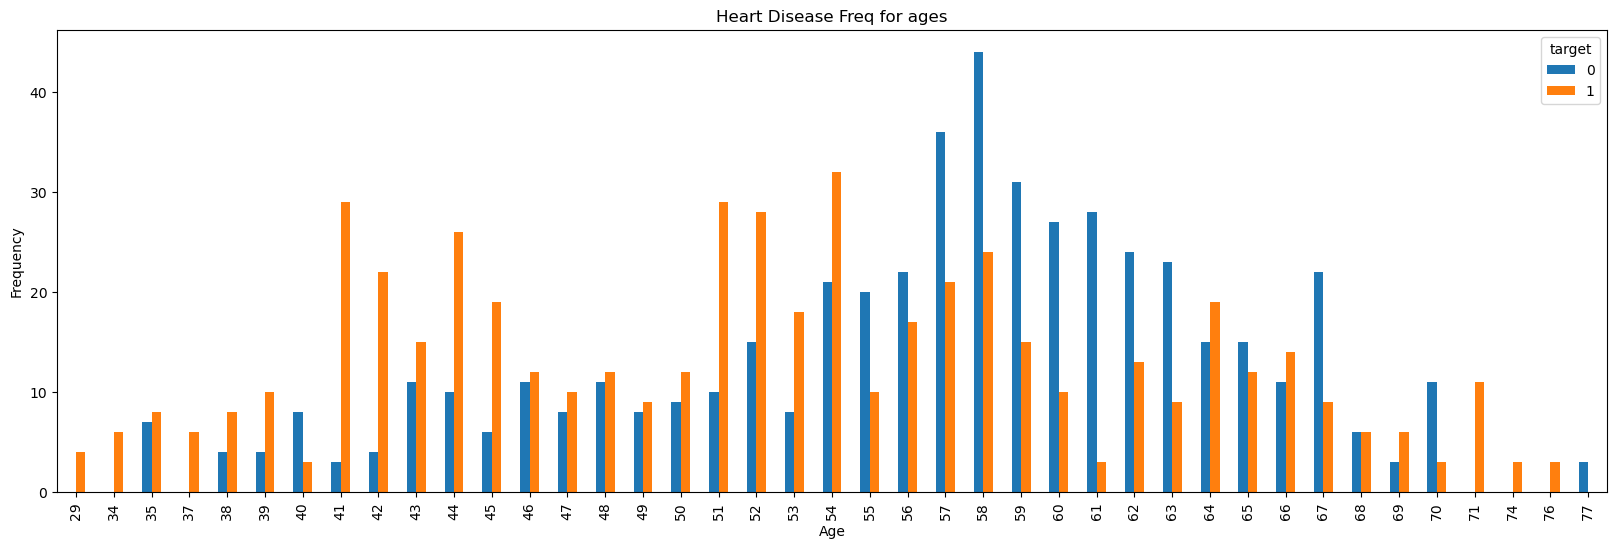

In [9]:
# barplot showing heart disease freq of age
pd.crosstab(df.age,df.target).plot(kind='bar',figsize=(20,6))
plt.title('Heart Disease Freq for ages')
plt.xlabel('Age')
plt.ylabel('Frequency')

Text(0, 0.5, 'Frequency')

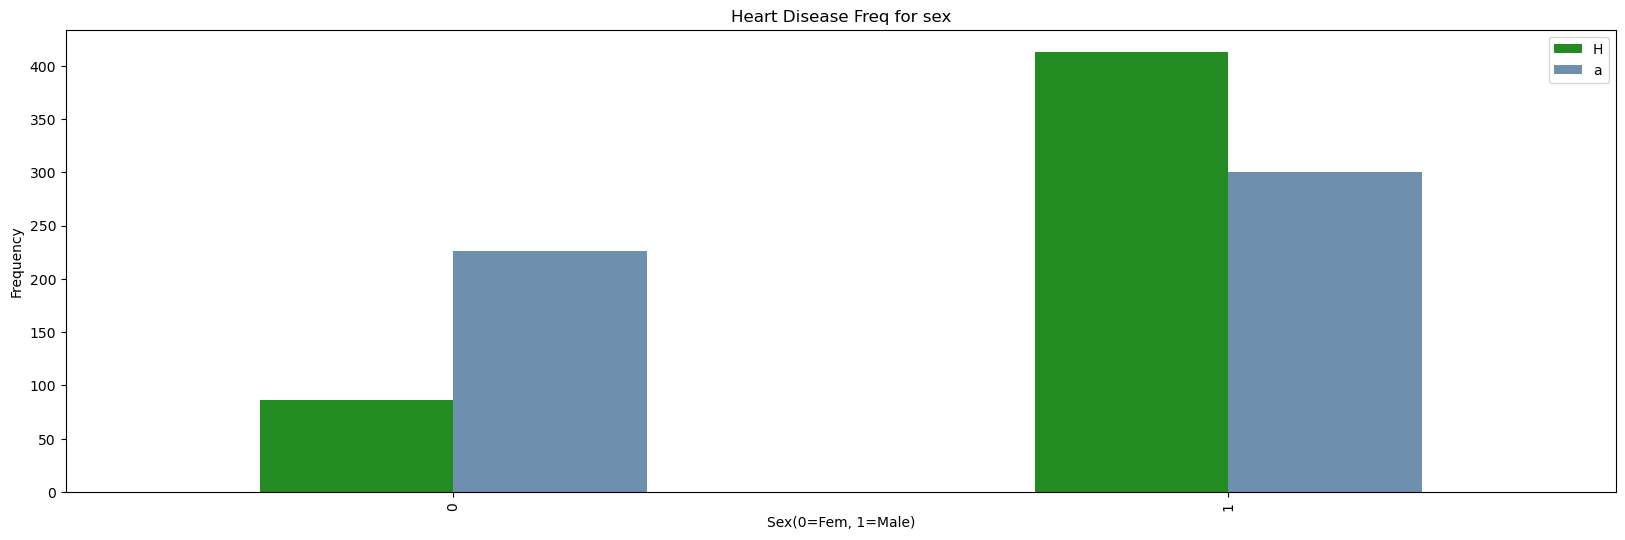

In [10]:
# Data visualisation of Heart Disease Freq for sex 

pd.crosstab(df.sex,df.target).plot(kind='bar',figsize=(20,6),color= ["#228B22","#6F8FAF"])
plt.title('Heart Disease Freq for sex')
plt.xlabel('Sex(0=Fem, 1=Male)')
plt.legend('Have disease')
plt.ylabel('Frequency')

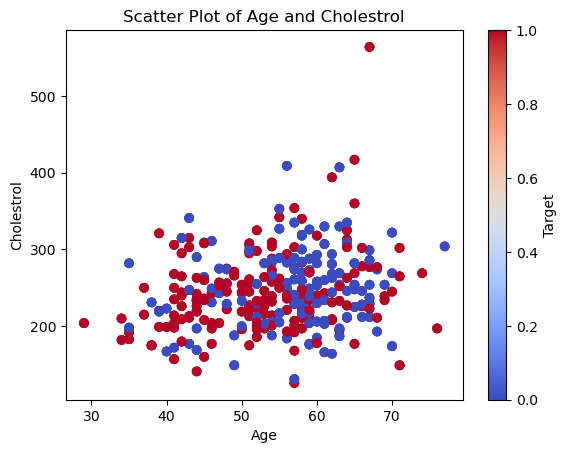

In [11]:
plt.scatter(df.age,df.chol,c=df['target'],cmap='coolwarm')
plt.title("Scatter Plot of Age and Cholestrol")
plt.xlabel("Age")
plt.ylabel("Cholestrol")
plt.colorbar(label='Target')
plt.show()

In [12]:
# Creating a model for logistics Regression
y=df.target.values
x_data = df.drop(['target'], axis =1)

In [13]:
# normalize the data , split the data into trainimg and testing
# 80% training, 20$ testing
# normalize the data x=(x-xmin)/(xmax-xmin)

x= (x_data-np.min(x_data)) / (np.max(x_data)- np.min(x_data))


c:\Users\Dell inspiron\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.min(axis=None) will return a scalar min over the entire DataFrame. To retain the old behavior, use 'frame.min(axis=0)' or just 'frame.min()'
  return reduction(axis=axis, out=out, **passkwargs)
c:\Users\Dell inspiron\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:84: FutureWarning: In a future version, DataFrame.max(axis=None) will return a scalar max over the entire DataFrame. To retain the old behavior, use 'frame.max(axis=0)' or just 'frame.max()'
  return reduction(axis=axis, out=out, **passkwargs)


In [14]:
# split the data 80% training 20% testing
x_train,x_test,y_train,y_test, train_test_split(x,y,test_size = 0.2,random_state=0)

# Logistics regression, training nd testing, independent variable and dependent, decision tree,i

NameError: name 'x_train' is not defined

In [ ]:
# transpose matrices
x_train = x_train.T
y_train= y_train.T
x_test= x_test.T

In [ ]:
# ML,   train and test, 
# Training data
# independent variables
# Divide data, X and  Y
x_train,


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#  lets say x- independent variables(input features) , y -dependent variables
# when dealing with logistic regression, its important to store independent variables in x
# store dependent variables(target data) in Y
# Split data into training and testing sets

X_train, X_test, y_train, y_test= train_test_split=(X,y, test_size=0.3,random_state=40)

# Model training
model= LogisticRegression()
model.fit(X_train,y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)



SyntaxError: invalid syntax (2787661449.py, line 10)

In [21]:
# Create data using array
import numpy as np
from sklearn import linear_model
X = np.array([1,23,4])
y=np.array([0,0,1,1])  #0 is No and 1 is Yes

In [24]:
from sklearn.linear_model import LinearRegression


In [23]:
logr = linear_model.LogisticRegression()
logr.fit(X,y)

# ModelEvaluation

y_pred = logr.predict(numpy_array([3]).reshape(-1,1))
# accuracy = accuracy_score(y_test,y_pred)

# Displayresults
print(y_pred)


ValueError: Expected 2D array, got 1D array instead:
array=[ 1. 23.  4.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [ ]:
# Decision Tree
# Uses classification and regression
# Pros
# Esy to understand, can handle both regression and classification
# captures nonlinear rlships
# can handle missing values or outliers

# Cons
# prone to overfitting
# sensitive to small changes 
# May not perform well w features or  noisy data

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Display results
print('Accuracy:', accuracy)

# Worked example 1

# Learn how to set up the django and flask on your environment
# We develop the django and flask application

# Final
# Summary
# 1. DS data science
# 2.ML Machine Learning
# 3.WD Web devt

# The final project will be out on friday